In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

# Importing Dataset

In [35]:
dataset = pd.read_csv('data_dsProject.csv')
dataset.shape

(400, 13)

# Removing Duplicates

In [36]:
dataset.drop_duplicates(ignore_index=True)
dataset = dataset.dropna()
dataset.shape

(399, 13)

In [56]:
columns = ['Cough', 'Fever', 'Cold', 'Headache', 'StomachPain', 'Diarrhea']


for column in columns:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

# Removing Outliers
Methods Used
- IQR
- Z-Score

In [38]:
Q1 = dataset.Cough.quantile(0.25)
Q3 = dataset.Cough.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
# print(lower_limit, upper_limit)

outliers = dataset[(dataset.Cough<lower_limit)|(dataset.Cough>upper_limit)]
# print(outliers)
new_df = dataset[(dataset.Cough>lower_limit)&(dataset.Cough<upper_limit)]

new_df

,Unnamed: 0,Name,Degree,Age,RollNo,Sex,Cough,Fever,Cold,Headache,StomachPain,Diarrhea,Medication
0,0,ANISHKUMAR S,M.Tech,23.0,CS21M1003,Male,1.0,0.0,0.0,1.0,0.0,0.0,12.0
1,1,VADDADI S V NISCHAL PRADYOTH,B.Tech,23.0,CS20B1109,Male,0.0,1.0,1.0,0.0,0.0,0.0,9.0
2,2,ANKIT KUMAR,B.Tech,21.0,ME21B1059,Male,1.0,0.0,1.0,1.0,0.0,0.0,13.0
3,3,DEVANSH SINGH TOMAR,B.Tech,21.0,EC21B1079,Male,0.0,1.0,1.0,0.0,0.0,0.0,14.0
4,4,SHUBHAM SINGH,B.Tech,21.0,ME21B1060,Male,0.0,0.0,1.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394,AMIT UTTAM CHIGARE,B.Tech,24.0,EC20B1071,Male,0.0,1.0,0.0,0.0,25.0,0.0,4.0
395,395,JALLI NARENDRA,B.Tech,21.0,ME20B1051,Male,1.0,1.0,56.0,0.0,0.0,0.0,11.0
397,397,DARA PRANAV,B.Tech,21.0,EC20B1045,Male,0.0,0.0,1.0,16.0,0.0,0.0,3.0
398,398,RUSHABH RAJUKUMAR DARJI,B.Tech,23.0,EC21B1088,Male,1.0,178.0,0.0,1.0,0.0,0.0,14.0


In [39]:
Q1 = dataset.Fever.quantile(0.25)
Q3 = dataset.Fever.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
# print(lower_limit, upper_limit)

fever_outliers = new_df[(new_df.Fever<lower_limit)|(new_df.Fever>upper_limit)]
# print(fever_outliers)
outliers = pd.concat([outliers, fever_outliers])
new_df = new_df[(new_df.Fever>lower_limit)&(new_df.Fever<upper_limit)]

new_df

,Unnamed: 0,Name,Degree,Age,RollNo,Sex,Cough,Fever,Cold,Headache,StomachPain,Diarrhea,Medication
0,0,ANISHKUMAR S,M.Tech,23.0,CS21M1003,Male,1.0,0.0,0.0,1.0,0.0,0.0,12.0
1,1,VADDADI S V NISCHAL PRADYOTH,B.Tech,23.0,CS20B1109,Male,0.0,1.0,1.0,0.0,0.0,0.0,9.0
2,2,ANKIT KUMAR,B.Tech,21.0,ME21B1059,Male,1.0,0.0,1.0,1.0,0.0,0.0,13.0
3,3,DEVANSH SINGH TOMAR,B.Tech,21.0,EC21B1079,Male,0.0,1.0,1.0,0.0,0.0,0.0,14.0
4,4,SHUBHAM SINGH,B.Tech,21.0,ME21B1060,Male,0.0,0.0,1.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,392,UDITRAJ SAWNER,DD,24.0,MFD19I002,Male,0.0,0.0,1.0,1.0,23.0,0.0,13.0
394,394,AMIT UTTAM CHIGARE,B.Tech,24.0,EC20B1071,Male,0.0,1.0,0.0,0.0,25.0,0.0,4.0
395,395,JALLI NARENDRA,B.Tech,21.0,ME20B1051,Male,1.0,1.0,56.0,0.0,0.0,0.0,11.0
397,397,DARA PRANAV,B.Tech,21.0,EC20B1045,Male,0.0,0.0,1.0,16.0,0.0,0.0,3.0


In [40]:
Q1 = dataset.Cold.quantile(0.25)
Q3 = dataset.Cold.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit, upper_limit)

cold_outliers = new_df[(new_df.Cold<lower_limit)|(new_df.Cold>upper_limit)]
print(cold_outliers)
outliers = pd.concat([outliers, cold_outliers])
new_df = new_df[(new_df.Cold>lower_limit)&(new_df.Cold<upper_limit)]

new_df

-1.5 2.5
     Unnamed: 0                      Name   Degree   Age     RollNo     Sex  \
381         381  SAMA SAI TEJESHWAR REDDY   B.Tech  24.0  CS20B1118    Male   
388         388        MANYA CHINTHAMALLA  B.Tech.  20.0  EC23B1034  Female   
395         395            JALLI NARENDRA   B.Tech  21.0  ME20B1051    Male   

     Cough  Fever  Cold  Headache  StomachPain  Diarrhea  Medication  
381    0.0    1.0  14.0       0.0          0.0       0.0         9.0  
388    0.0    1.0  17.0       0.0          0.0       0.0         9.0  
395    1.0    1.0  56.0       0.0          0.0       0.0        11.0  


,Unnamed: 0,Name,Degree,Age,RollNo,Sex,Cough,Fever,Cold,Headache,StomachPain,Diarrhea,Medication
0,0,ANISHKUMAR S,M.Tech,23.0,CS21M1003,Male,1.0,0.0,0.0,1.0,0.0,0.0,12.0
1,1,VADDADI S V NISCHAL PRADYOTH,B.Tech,23.0,CS20B1109,Male,0.0,1.0,1.0,0.0,0.0,0.0,9.0
2,2,ANKIT KUMAR,B.Tech,21.0,ME21B1059,Male,1.0,0.0,1.0,1.0,0.0,0.0,13.0
3,3,DEVANSH SINGH TOMAR,B.Tech,21.0,EC21B1079,Male,0.0,1.0,1.0,0.0,0.0,0.0,14.0
4,4,SHUBHAM SINGH,B.Tech,21.0,ME21B1060,Male,0.0,0.0,1.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,391,HARI GOVIND S,DD,25.0,CED19I048,Male,1.0,1.0,1.0,1.0,0.0,15.0,15.0
392,392,UDITRAJ SAWNER,DD,24.0,MFD19I002,Male,0.0,0.0,1.0,1.0,23.0,0.0,13.0
394,394,AMIT UTTAM CHIGARE,B.Tech,24.0,EC20B1071,Male,0.0,1.0,0.0,0.0,25.0,0.0,4.0
397,397,DARA PRANAV,B.Tech,21.0,EC20B1045,Male,0.0,0.0,1.0,16.0,0.0,0.0,3.0


In [41]:
Q1 = dataset.Headache.quantile(0.25)
Q3 = dataset.Headache.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit, upper_limit)

headache_outliers = new_df[(new_df.Headache<lower_limit)|(new_df.Headache>upper_limit)]

outliers = pd.concat([outliers, headache_outliers])
new_df = new_df[(new_df.Headache>lower_limit)&(new_df.Headache<upper_limit)]

-1.5 2.5


In [42]:
data = new_df
data['z_score1'] = (data.StomachPain - data.StomachPain.mean())/data.StomachPain.std()

stomach_outliers = data[(data['z_score1']>3)|(data['z_score1']<-3)]
outliers = pd.concat([outliers, stomach_outliers])
new_df = data[(data['z_score1']<3)&(data['z_score1']>-3)]

new_df.drop(columns='z_score1', axis=1, inplace=True)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_24916\2143113701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['z_score1'] = (data.StomachPain - data.StomachPain.mean())/data.StomachPain.std()
C:\Users\Pranav\AppData\Local\Temp\ipykernel_24916\2143113701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns='z_score1', axis=1, inplace=True)


In [43]:
data = new_df
data['z_score1'] = (data.Diarrhea - data.Diarrhea.mean())/data.Diarrhea.std()

motions_outliers = data[(data['z_score1']>3)|(data['z_score1']<-3)]
outliers = pd.concat([outliers, motions_outliers])
new_df = data[(data['z_score1']<3)&(data['z_score1']>-3)]

new_df.drop(columns='z_score1', axis=1, inplace=True)
outliers.drop(columns='z_score1', axis=1, inplace=True)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_24916\825879014.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns='z_score1', axis=1, inplace=True)


In [44]:
outliers

,Unnamed: 0,Name,Degree,Age,RollNo,Sex,Cough,Fever,Cold,Headache,StomachPain,Diarrhea,Medication
379,379,PEDDISETTY JASHWANTH,B.Tech,21.0,CS20B1007,Male,78.0,1.0,1.0,1.0,0.0,0.0,14.0
380,380,G K ANIRUDDH,B.Tech,22.0,ME21B1032,Male,91.0,1.0,0.0,1.0,0.0,0.0,14.0
383,383,KADARLA VISHWAGNA,B.Tech,20.0,CS21B1035,Female,11.0,0.0,0.0,1.0,0.0,0.0,12.0
385,385,CHAANDINI VISWANATHAN,B.Tech,22.0,CS22B2003,Female,121.0,1.0,0.0,0.0,0.0,0.0,11.0
396,396,GOLLALA VIVEK VARDHAN REDDY,B.Tech,19.0,ME22B2019,Male,27.0,1.0,0.0,0.0,0.0,0.0,4.0
387,387,GADDALA JAHNAVI,B.Tech.,20.0,CS23B1077,Female,0.0,26.0,0.0,0.0,1.0,1.0,16.0
390,390,CHALAKAPALLI SAI VARDHAN,DD,24.0,CED19I010,Male,1.0,19.0,1.0,0.0,0.0,0.0,10.0
393,393,GADIPUTI MADHAVA KALYAN,B.Tech,24.0,CS20B1084,Male,1.0,26.0,0.0,1.0,0.0,0.0,12.0
398,398,RUSHABH RAJUKUMAR DARJI,B.Tech,23.0,EC21B1088,Male,1.0,178.0,0.0,1.0,0.0,0.0,14.0
381,381,SAMA SAI TEJESHWAR REDDY,B.Tech,24.0,CS20B1118,Male,0.0,1.0,14.0,0.0,0.0,0.0,9.0


In [45]:
new_df

,Unnamed: 0,Name,Degree,Age,RollNo,Sex,Cough,Fever,Cold,Headache,StomachPain,Diarrhea,Medication
0,0,ANISHKUMAR S,M.Tech,23.0,CS21M1003,Male,1.0,0.0,0.0,1.0,0.0,0.0,12.0
1,1,VADDADI S V NISCHAL PRADYOTH,B.Tech,23.0,CS20B1109,Male,0.0,1.0,1.0,0.0,0.0,0.0,9.0
2,2,ANKIT KUMAR,B.Tech,21.0,ME21B1059,Male,1.0,0.0,1.0,1.0,0.0,0.0,13.0
3,3,DEVANSH SINGH TOMAR,B.Tech,21.0,EC21B1079,Male,0.0,1.0,1.0,0.0,0.0,0.0,14.0
4,4,SHUBHAM SINGH,B.Tech,21.0,ME21B1060,Male,0.0,0.0,1.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,SUJAY S GANIGER,B.Tech,23.0,CS21B2007,Male,1.0,0.0,0.0,0.0,0.0,0.0,14.0
376,376,SACHIN YADAV,B.Tech,20.0,EC21B1080,Male,0.0,0.0,0.0,0.0,1.0,1.0,16.0
377,377,SRIKANTH T R,B.Tech,23.0,CS21B2040,Male,1.0,1.0,1.0,0.0,0.0,0.0,15.0
378,378,AJITHA ARVINTH,B.Tech,22.0,CS22B1046,Female,1.0,1.0,1.0,0.0,0.0,0.0,15.0


# Correlations analysis

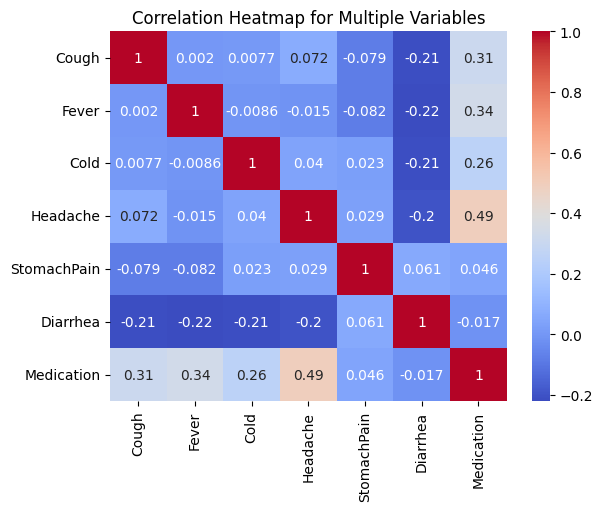

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = new_df.iloc[:, 6:].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Multiple Variables")
plt.show()

# Data Analysis
- Relationship between each symptom with the Medication
- Each graph shows for each medication how many people are having that particular symptom

<Figure size 1000x800 with 0 Axes>

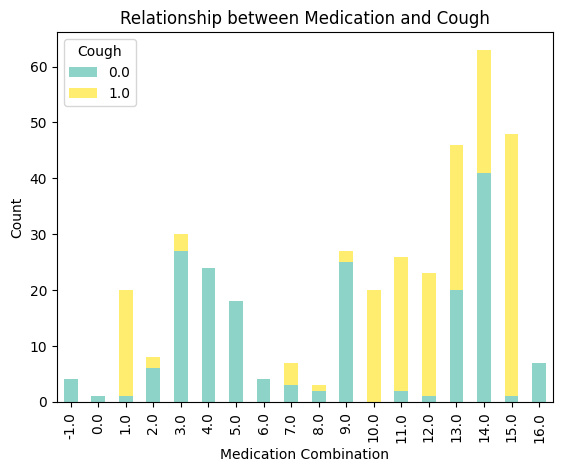

<Figure size 1000x800 with 0 Axes>

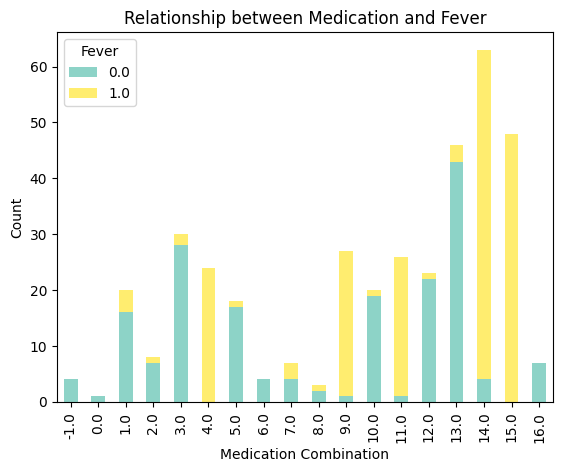

<Figure size 1000x800 with 0 Axes>

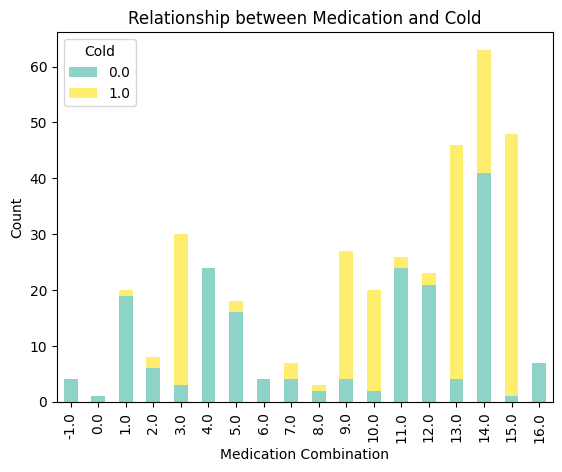

<Figure size 1000x800 with 0 Axes>

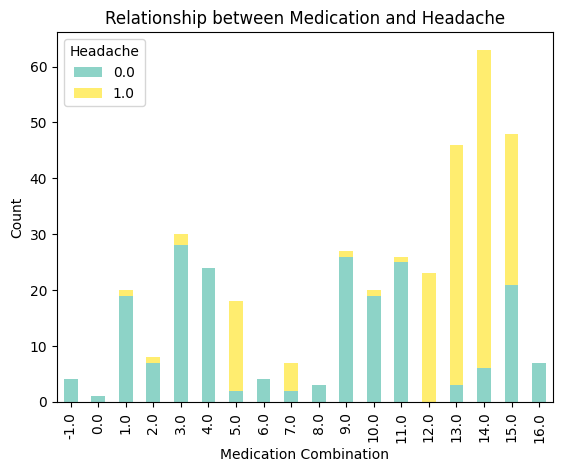

<Figure size 1000x800 with 0 Axes>

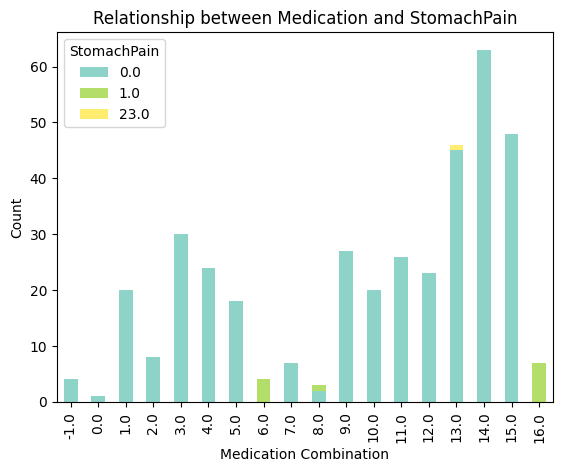

<Figure size 1000x800 with 0 Axes>

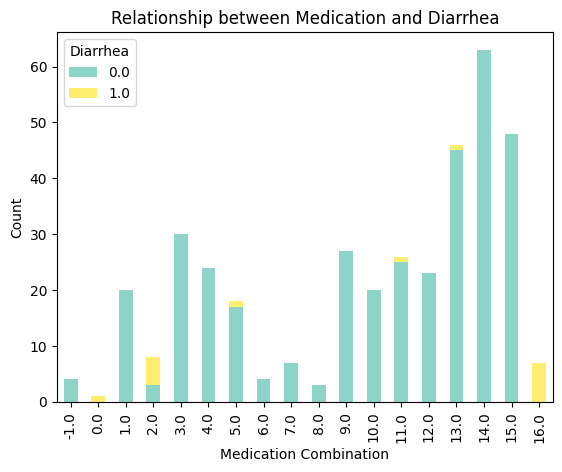

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

symptom_columns = ['Cough', 'Fever', 'Cold', 'Headache', 'StomachPain', 'Diarrhea']
medication_column = 'Medication'

for symptom in symptom_columns:
    plt.figure(figsize=(10, 8))

    grouped = new_df.groupby([medication_column, symptom])[symptom].count().unstack(fill_value=0)

    grouped.plot(kind='bar', stacked=True, colormap='Set3')
    
    plt.title(f'Relationship between Medication and {symptom}')
    plt.xlabel('Medication Combination')
    plt.ylabel('Count')
    
    plt.show()


# KNN

In [48]:
x_train = new_df.iloc[:320, 6:-1].values
y_train = new_df.iloc[:320, -1].values

x_test = new_df.iloc[320:, 6:-1].values
y_test = new_df.iloc[320:, -1].values

accuracy = []

# # ---------------------------- KNN -----------------------------------------------------------

def KNN(x_test, k):
    dist = np.zeros((len(x_test), len(x_train)))
    for i in range(x_test.shape[0]):
        for j in range(x_train.shape[0]):
            dist[i, j] = np.sqrt(np.sum((x_test[i] - x_train[j])**2))

    y_pred = []

    for distance in dist:
        k_indices = np.argsort(distance)[:k]
        k_near_labels = y_train[k_indices]
        k_near_labels = k_near_labels.astype(int)
        k_near_labels = np.array(k_near_labels)
        non_negative_labels = k_near_labels[k_near_labels >= 0]
        if non_negative_labels.size > 0:
            y_pred.append(np.bincount(non_negative_labels).argmax())
        else:
            # continue
            y_pred.append(-2)

    return y_pred

# for i in range(20):
#     KNN(x_test, i)

y_pred = KNN(x_test, 5)
print('Accuracy Percentage (KNN, K=5): ', accuracy_score(y_pred, y_test)*100)

Accuracy Percentage (KNN, K=5):  93.22033898305084


# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_pred, y_test)

0.9491525423728814

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_pred, y_test)

0.9491525423728814

# Actual v/s Predicted

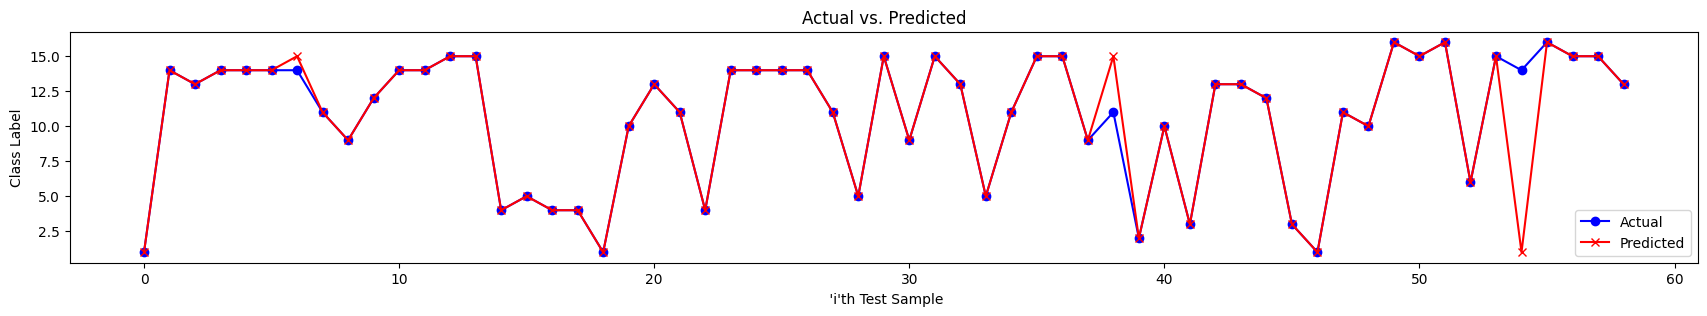

In [51]:
indices = indices = np.arange(len(y_test))

plt.figure(figsize=(21, 3))
plt.plot(indices, y_test, label='Actual', marker='o', color='blue')
plt.plot(indices, y_pred, label='Predicted', marker='x', color='red')
plt.xlabel(" 'i'th Test Sample")
plt.ylabel('Class Label')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [52]:
# name = input('Enter your Name : ')
# degree = input('Enter the degree [B.Tech/M.Tech/DD]: ')
# age = int(input('Enter your age : '))
# roll = input('Enter your Roll Number : ')
# sex = ''
# flag = 1
# while flag == 1:
#     sex = input('Enter your Gender [M/F]: ')
#     if sex == 'M' or sex == 'm':
#         sex = 'Male'
#         flag = 0
#     elif sex == 'F' or sex == 'f':
#         sex = 'Female'
#         flag = 0
#     else:
#         print('[ERROR] Invalid Input')
# cough = ''
# flag = 1
# while flag == 1:
#     cough = input('Do you have Cough [Y/n] : ')
#     if cough == 'Y' or cough == 'y':
#         cough = 1
#         flag = 0
#     elif cough == 'N' or cough == 'n':
#         cough = 0
#         flag = 0
#     else:
#         print('[ERROR] Invalid Input')
# fever = ''
# flag = 1
# while flag == 1:
#     fever = input('Do you have Fever [Y/n] : ')
#     if fever == 'Y' or fever == 'y':
#         fever = 1
#         flag = 0
#     elif fever == 'N' or fever == 'n':
#         fever = 0
#         flag = 0
#     else:
#         print('[ERROR] Invalid Input')
# cold = ''
# flag = 1
# while flag == 1:
#     cold = input('Do you have Cold [Y/n] : ')
#     if cold == 'Y' or cold == 'y':
#         cold = 1
#         flag = 0
#     elif cold == 'N' or cold == 'n':
#         cold = 0
#         flag = 0
#     else:
#         print('[ERROR] Invalid Input')
# headache = ''
# flag = 1
# while flag == 1:
#     headache = input('Do you have Headache [Y/n] : ')
#     if headache == 'Y' or headache == 'y':
#         headache = 1
#         flag = 0
#     elif headache == 'N' or headache == 'n':
#         headache = 0
#         flag = 0
#     else:
#         print('[ERROR] Invalid Input')    
# stomachpain = ''
# diarrhea = ''
# if cough == 0 and cold == 0 and fever == 0 and headache == 0:
#     flag = 1
#     while flag == 1:
#         stomachpain = input('Do you have Stomach Pain [Y/n] : ')
#         if stomachpain == 'Y' or stomachpain == 'y':
#             stomachpain = 1
#             flag = 0
#         elif stomachpain == 'N' or stomachpain == 'n':
#             stomachpain = 0
#             flag = 0
#         else:
#             print('[ERROR] Invalid Input') 
#     flag = 1
#     while flag == 1:   
#         diarrhea = input('Do you have Diarrhea [Y/n] : ')
#         if diarrhea == 'Y' or diarrhea == 'y':
#             diarrhea = 1
#             flag = 0
#         if diarrhea == 'N' or diarrhea == 'n':
#             diarrhea = 0
#             flag = 0
#         else:
#             print('[ERROR] Invalid Input')
# else:
#     stomachpain = 0
#     diarrhea = 0

# data = {
#     'Name': name,
#     'Degree': degree,
#     'Age': age,
#     'RollNo': roll,
#     'Sex': sex,
#     'Cough': cough,
#     'Fever': fever,
#     'Cold': cold,
#     'Headache': headache,
#     'Stomach Pain': stomachpain,
#     'Diarrhea': diarrhea
# }

# index = [1]
# newdata = pd.DataFrame(data, index=index)

# test = newdata.iloc[:, 5:].values

# medication = KNN(test, 5)

# drugs = [['ascoril'], ['biflac'], ['montec lc'], ['paracetmol'], ['dolo 650'],
#          ['eldoper'], ['ascoril', 'paracetmol', 'dolo 650'], ['montec lc', 'paracetmol', 'dolo 650'],
#          ['montec lc', 'paracetmol'], ['ascoril', 'montec lc'], ['ascoril', 'paracetmol'], ['ascoril', 'dolo 650'],
#          ['montec lc', 'dolo 650'], ['paracetmol', 'dolo 650'], ['montec lc', 'paracetmol', 'ascoril'],
#          ['biflac', 'eldoper']]

# print('Prescribed Medication : ', drugs[medication[0]-1])

